https://drive.google.com/file/d/1TWSUuVqKZGmCWjwL6QLcWjMI7MpP4sIu/view?usp=drive_link

In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
!ls /content/drive/MyDrive/hw/

In [ ]:
pwd

#yolov8 훈련하기 시작

dataset을 저장할 폴더를 만들고 그곳으로 들어갑니다

In [ ]:
%mkdir dataset

In [ ]:
!cp /content/drive/MyDrive/hw/hw.zip /content/
#!cp /content/drive/MyDrive/data/train_team.zip /content/
#!cp /content/drive/MyDrive/data/val_team.zip /content/
#!cp /content/drive/MyDrive/data/test_team.zip /content/

In [ ]:
#!unzip /content/drive/MyDrive/team/team.zip -d /content/dataset/
!unzip /content/hw.zip -d /content/dataset/
#!unzip /content/drive/MyDrive/team/team.zip -d /content/drive/MyDrive/
#!unzip /content/train_team.zip -d dataset/train/
#!unzip /content/val_team.zip -d dataset/val/
#!unzip /content/test_team.zip -d dataset/test/

In [ ]:
#%cd dataset

In [ ]:
import glob
import cv2
from google.colab.patches import cv2_imshow
import random


# 이미지 파일 경로를 가져오기
#image_paths = glob.glob('/content/drive/MyDrive/team/test/images/*.jpg')
#image_paths = glob.glob('/content/dataset/team/test/images/*.jpg')
image_paths = glob.glob('/content/dataset/hw/test/images/*.jpg')

# 이미지가 없는 경우 에러 처리
if not image_paths:
    print("이미지 파일이 없습니다.")
else:
    # 랜덤하게 이미지 선택
    selected_image_path = random.choice(image_paths)

    # 이미지 표시
    img = cv2.imread(selected_image_path)
    cv2_imshow(img)

해당경로에 이미지와 data.yaml이 나온것을 확인 할 수 있습니다

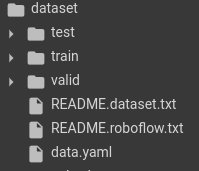

data.yaml을 확인합니다

In [ ]:
#%cat data.yaml

새로운 yaml파일을 만들고 train, val, test 데이터셋 경로가 올바른게 작성해줘야 합니다



```
변경전                       변경후
train: ../train/images  ->  'train' : '/content/dataset/train/images'
```



In [ ]:
import yaml

data = {'train' : '/content/dataset/hw/train/images',
        'test' : '/content/dataset/hw/test/images',
        'val' : '/content/dataset/hw/valid/images',
        'nc': 3,
        'names': ['paper','rock','scissors']
}

with open('/content/dataset/hw/custom_data.yaml', 'w') as f:
  yaml.dump(data, f)

custom_data.yaml 파일을 만들었으니 제대로 작성이 되었는지 확인합니다

In [ ]:
with open('/content/dataset/hw/custom_data.yaml', 'r') as f:
  view_yaml = yaml.safe_load(f)
  display(view_yaml)


yolov8을 인스톨합니다

In [ ]:
!pip install ultralytics

yolov8이 제대로 설치가 되었는지 확인합니다

In [ ]:
import ultralytics

ultralytics.checks()

사전에 학습된 yolov8n.pt를 가져오고 적용시킵니다

yolov8의 학습파일은 yolov8n.pt, yolov8s.pt, yolov8m.pt, yolov8l.pt, yolov8x.pt 등이 있습니다

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

yolov8에서 사용하는 model이 yolov8n.pt 인지 확인해봅니다

yolov8은 cocodata의 분류를 가져서 80개의 name이 저장되어있습니다

In [ ]:
print(type(model.names),len(model.names))

print(model.names)

우리가 원하는 데이터셋 경로를 가진 custom_data.yaml을 가지고 학습을 시작합니다

In [ ]:
#model.train(data='/content/drive/MyDrive/team/custom_data.yaml', epochs= 25, patience = 20, batch=32, imgsz =416)
model.train(data='/content/dataset/hw/custom_data.yaml', epochs= 20, patience = 20, batch=2)

학습한 결과 분석은 다음경로에 새롭게 저장되었습니다

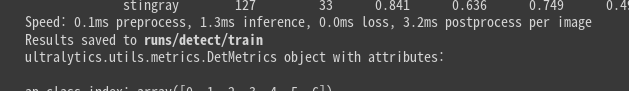

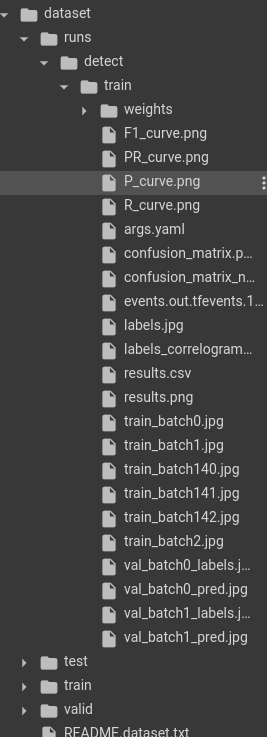

학습한 모델은 weights/best.pt 로 저장되어있습니다

yolov8은 학습하고 나서 자동적으로 모델을 변경합니다

실제로 변경되는지 확인합니다

In [ ]:
print(type(model.names),len(model.names))

print(model.names)

학습된 결과물을 출력하는 부분입니다

마지막 출력문인 'Results saved to '이후에 나오는 경로가 학습된 이미지 출력이 있는 폴더의 경로입니다

image.png

In [ ]:
results = model.predict(source ='/content/dataset/hw/test/images/', save=True)

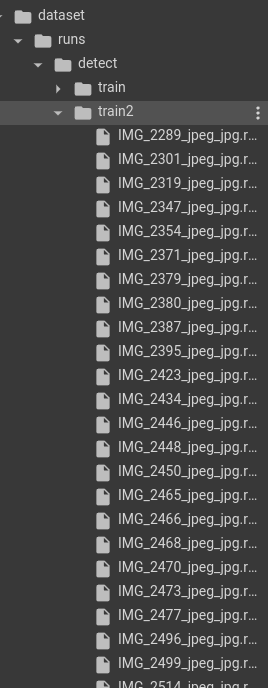

해당 경로에서 랜덤으로 이미지 출력을 보는 코드입니다

colab은 특수한 패키지를 사용해야 볼 수 있습니다

In [ ]:

# 이미지 파일 경로를 가져오기
image_paths = glob.glob('/content/runs/detect/train2/*.jpg')

# 이미지가 없는 경우 에러 처리
if not image_paths:
    print("이미지 파일이 없습니다.")
else:
    # 랜덤하게 이미지 선택
    selected_image_path = random.choice(image_paths)

    # 이미지 표시
    img = cv2.imread(selected_image_path)
    cv2_imshow(img)

만약 실제로 학습한 데이터를 자신의 드라이브에 저장하고 싶다면

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
%mkdir /content/drive/MyDrive/hw

In [ ]:
%cp runs/detect/train/weights/best.pt /content/drive/MyDrive/hw